## Simulations of Bias in Spectral Fitting 

Sherpa simulations generates spectrum using fake_pha() which is fit using different statistics. The resulting parameters, statistic value and number of counts in the spectrum is written to a standard ascii file.

In [1]:
from sherpa.astro.ui import *
from glob import glob

Simulations take a lot of run time and in this example only one spectrum is generated and fit with different statistics.

In [2]:
# n_sim number of simulationss
n_sim = 1

In [3]:
# load data for fitting and filter

#load_pha("source.pi")
load_pha("q1127_src1.pi")
notice_id(1,0.3, 7.0)

read ARF file q1127_src1.warf
read RMF file q1127_src1.wrmf
read ARF (background) file q1127_bkg1.warf
read RMF (background) file q1127_bkg1.wrmf
read background file q1127_bkg1.pi


In [4]:
# assume a model, set gal Nh value and freeze, freeze redshift
# of the intrinsic absorber

In [15]:
set_model(xsphabs.abs1*powlaw1d.p1)
abs1.nH = 0.1
p1.gamma = 1.28
p1.ampl = 0.0007

# set initial stat/method for fit

set_stat('cstat')
set_method("neldermead")
set_method_opt('ftol',1.e-4)
# Initial fit to populate the fit object
fit()

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 689.276
Final fit statistic   = 670.643 at function evaluation 340
Data points           = 460
Degrees of freedom    = 457
Probability [Q-value] = 2.57002e-10
Reduced statistic     = 1.46749
Change in statistic   = 18.6332
   abs1.nH        0.103907    
   p1.gamma       1.28327     
   p1.ampl        0.000716624 


In [16]:
r1=get_fit_results()

#Reset the parameters to the required setting for the simulations

r1.parvals=(0.1,1.28,0.0007)
stat0=['chi2modvar','cash','chi2gehrels','cstat','chi2datavar']

In [17]:
# check the fit object and the parameter values for the simulations
print(r1)

datasets       = (1,)
itermethodname = none
methodname     = neldermead
statname       = cstat
succeeded      = True
parnames       = ('abs1.nH', 'p1.gamma', 'p1.ampl')
parvals        = (0.1, 1.28, 0.0007)
statval        = 670.6431502019245
istatval       = 689.2763004354964
dstatval       = 18.633150233571882
numpoints      = 460
dof            = 457
qval           = 2.5700175412019726e-10
rstat          = 1.4674904818422856
message        = Optimization terminated successfully
nfev           = 340


In [18]:
# Open the file to write the results of the fitting
# write the top line with column names and initial parameter values for the simulations:
delim = '\t'
filename = 'notebook1000_low_no_dvar.txt'
file0=open(filename,'w')
print('#',delim.join(r1.parnames), 'stat.name', 'stat.val', 'cts', file=file0)
print(delim.join([str(x) for x in r1.parvals]), get_stat().name, get_fit_results().statval, 
      calc_data_sum(0.3,7.),file=file0)

Simulation loop:

In [19]:
# This is the main simulation loop, 
# n_sim defines the number of simulations,
# ExpTime - Exposure can be modified to change the number of counts in the spectrum, 
#the original 1.e5 generates 60000 counts
import logging
logging.getLogger('sherpa').setLevel(logging.ERROR)

from sherpa.utils.err import FitErr, EstErr, SherpaErr
n_sim=500
ExpTime=10000
for i in range(n_sim):
    # Set parameter values to the original fit values
    for ip, parname in enumerate(r1.parnames):
        set_par(parname, r1.parvals[ip])
    notice()    
    fake_pha(1,get_arf(),get_rmf(),exposure=ExpTime)
    print(ExpTime, calc_data_sum(0.3,7.))
    ignore()
    notice_id(1,0.3,7.0)
    # Set statistics and fit, reset parameters before fitting
    for k in stat0:
        set_stat(k)
        for i0, parname in enumerate(r1.parnames):
            set_par(parname, r1.parvals[i0])
        try:
            fit()
        except FitErr:
            print(delim.join([str(x) for x in res1.parvals]), get_stat().name, 0., cts)# file=file0)
        else:
            res1=get_fit_results()
            cts=calc_data_sum(0.3,7.0)
            print(delim.join([str(x) for x in res1.parvals]), get_stat().name, get_fit_results().statval, cts, file=file0)
            file0.flush()

file0.close()
# restore the logger
logging.getLogger('sherpa').setLevel(logging.INFO)
print("Simulation finished")

10000 6108.0
0.11630206692672299	1.3277087499879867	0.00073869324290485 chi2datavar 0.0 6108.0
10000 6307.0
0.1099666616559687	1.2958866965476532	0.0007425443901161986 chi2datavar 0.0 6307.0
10000 6055.0
0.10632084012738313	1.2904344333460418	0.0007068211085693992 chi2datavar 0.0 6055.0
10000 5939.0
0.09277332464576266	1.2561767917005826	0.0006664572606025543 chi2datavar 0.0 5939.0
10000 6070.0
0.09138436694207745	1.2946031561728288	0.0006937112513854409 chi2datavar 0.0 6070.0
10000 6018.0
0.10248217570468499	1.2982424306575624	0.0007012890571049535 chi2datavar 0.0 6018.0
10000 6077.0
0.09187958621088764	1.3058831914274178	0.0006991684239080014 chi2datavar 0.0 6077.0
10000 6008.0
0.10849356694435656	1.3272191574734464	0.0007176980621762542 chi2datavar 0.0 6008.0
10000 6089.0
0.09646641374692305	1.2540670181499733	0.0006864158856270002 chi2datavar 0.0 6089.0
10000 6350.0
0.10581129584090201	1.3347955689992193	0.0007583800888275061 chi2datavar 0.0 6350.0
10000 6084.0
0.09418095179320556	

0.10553926032428028	1.3168653700733914	0.0007276299470841224 chi2datavar 0.0 6153.0
10000 6147.0
0.11464894024848113	1.2872636404880216	0.000725403141861755 chi2datavar 0.0 6147.0
10000 6098.0
0.1054130587008612	1.2696959755178965	0.0007028643849261735 chi2datavar 0.0 6098.0
10000 6056.0
0.10510484207417344	1.3197364053177416	0.0007167609235597563 chi2datavar 0.0 6056.0
10000 6079.0
0.0882626536758118	1.2497253542690618	0.0006750223108823222 chi2datavar 0.0 6079.0
10000 6038.0
0.09317426970262319	1.2801638803537683	0.0006867698731726872 chi2datavar 0.0 6038.0
10000 6137.0
0.11646024563205148	1.3147037818981913	0.0007371844460987021 chi2datavar 0.0 6137.0
10000 6001.0
0.11288163674154572	1.2840069224346313	0.0007050366337671719 chi2datavar 0.0 6001.0
10000 6107.0
0.0966763212879423	1.2876685395478051	0.0007012573889582218 chi2datavar 0.0 6107.0
10000 6062.0
0.11324233744768183	1.3205464215819291	0.0007269005188648653 chi2datavar 0.0 6062.0
10000 6145.0
0.09962862182522973	1.266112021033

0.12865519060049926	1.342582739508026	0.000744776974145187 chi2datavar 0.0 5996.0
10000 6119.0
0.1111524705543859	1.2936762446230368	0.0007208415085266033 chi2datavar 0.0 6119.0
10000 6026.0
0.10158925607144262	1.2584487794477013	0.0006862960538784853 chi2datavar 0.0 6026.0
10000 6162.0
0.09345227940393912	1.2355085726220303	0.0006844477477625573 chi2datavar 0.0 6162.0
10000 6018.0
0.08669684798768204	1.2531869023741016	0.0006678428131484075 chi2datavar 0.0 6018.0
10000 6178.0
0.10103810253257837	1.280274263733393	0.0007114221972640817 chi2datavar 0.0 6178.0
10000 6044.0
0.10611584690478802	1.3107186774328867	0.0007130472497363512 chi2datavar 0.0 6044.0
10000 6098.0
0.09522767479318982	1.2711040508781966	0.0006924727078149516 chi2datavar 0.0 6098.0
10000 5989.0
0.08990432306399657	1.2208452636650575	0.0006563049261809975 chi2datavar 0.0 5989.0
10000 6068.0
0.09114360651223441	1.295176060365808	0.0006934231197918497 chi2datavar 0.0 6068.0
10000 6050.0
0.10793846807925372	1.2969941143749

0.10266126003840706	1.2642043432419081	0.0006837582744538669 chi2datavar 0.0 5975.0
10000 6166.0
0.09750168607867517	1.2763115652035815	0.0007046510392087299 chi2datavar 0.0 6166.0
10000 6172.0
0.09563084806692518	1.2867582698967017	0.0007072134392393307 chi2datavar 0.0 6172.0
10000 6306.0
0.0890811781091074	1.259778097959723	0.0007049258736852519 chi2datavar 0.0 6306.0
10000 6083.0
0.11669540456052616	1.3244732287361685	0.0007348319733632402 chi2datavar 0.0 6083.0
10000 6119.0
0.08548954567359643	1.2472689137982824	0.000675611021325035 chi2datavar 0.0 6119.0
10000 5980.0
0.0872827650955636	1.2460390725005155	0.0006616930202427941 chi2datavar 0.0 5980.0
10000 6012.0
0.08924171517457685	1.22058759074785	0.0006580634321794141 chi2datavar 0.0 6012.0
10000 6098.0
0.10114104845289425	1.275991568705937	0.0007006956264602122 chi2datavar 0.0 6098.0
10000 6194.0
0.09045921898843241	1.2615619532357705	0.0006945725123431027 chi2datavar 0.0 6194.0
10000 6149.0
0.08041684394988807	1.232265685231082

0.09402180534211363	1.2292328668605763	0.0006883257704981562 chi2datavar 0.0 6213.0
10000 6176.0
0.0976580105439733	1.2004375520364408	0.0006769438801980148 chi2datavar 0.0 6176.0
10000 6188.0
0.1052004293408181	1.295994219933495	0.0007232728234811301 chi2datavar 0.0 6188.0
10000 6031.0
0.10103665119373961	1.2925022796769123	0.000699073808755005 chi2datavar 0.0 6031.0
10000 6078.0
0.09610879766757631	1.2874951973485764	0.0006972401446073035 chi2datavar 0.0 6078.0
10000 6059.0
0.12024270535447655	1.3279415009828748	0.00073726455185044 chi2datavar 0.0 6059.0
10000 6014.0
0.08392545480918097	1.2148404933652277	0.0006508491553076284 chi2datavar 0.0 6014.0
10000 6087.0
0.09785734730808286	1.278902220481315	0.0006969780868596973 chi2datavar 0.0 6087.0
10000 6069.0
0.1130125356541421	1.30628809640682	0.0007219070072473999 chi2datavar 0.0 6069.0
10000 6111.0
0.09984662227116158	1.2942281278608505	0.0007076877092703644 chi2datavar 0.0 6111.0
10000 6030.0
0.10887258295909234	1.3132854737112183	0

0.07895926854406592	1.2326261968899068	0.0006569142350118835 chi2datavar 0.0 6059.0
10000 5958.0
0.09211474684358764	1.2426285263540398	0.0006630092237824624 chi2datavar 0.0 5958.0
10000 6019.0
0.09213387984137118	1.25510941538721	0.0006743733403086297 chi2datavar 0.0 6019.0
10000 6128.0
0.10927665519913157	1.3181828354508736	0.0007294118331318168 chi2datavar 0.0 6128.0
10000 5966.0
0.11424066474090436	1.3120696799394824	0.0007132136648954364 chi2datavar 0.0 5966.0
10000 6123.0
0.12021963713885919	1.3451146858147691	0.0007519415450421421 chi2datavar 0.0 6123.0
10000 6031.0
0.12298889776773915	1.3781422202100975	0.0007569401850840507 chi2datavar 0.0 6031.0
10000 6019.0
0.10453485617589464	1.294692308804292	0.0007023037965647205 chi2datavar 0.0 6019.0
10000 6113.0
0.09105192600295547	1.3050293556508705	0.0007020593461029373 chi2datavar 0.0 6113.0
10000 6126.0
0.08109665077158885	1.2304846644901548	0.0006656725424027942 chi2datavar 0.0 6126.0
10000 6120.0
0.09176435640018589	1.28822226782

Now make plots, use pycrates to read the file

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import pycrates as cr
import numpy as np

In [21]:
# Read the simulated parameters and statistics from the file
#d3=cr.read_file('notebook1_test_jan2020.txt')
#d3=cr.read_file('notebook1000_low_no_dvar.txt')
d3=cr.read_file(filename)
s0=['cash','chi2gehrels', 'chi2modvar','chi2datavar','cstat']
cr.get_col_names(d3)

['abs1.nH', 'p1.gamma', 'p1.ampl', 'stat.name', 'stat.val', 'cts']

In [22]:
# Define filter the data
data_filter = {}
for statname in s0:
   data_filter[statname] = {}
   for colname in [str(x) for x in cr.get_col_names(d3)]:
      ok = np.where(cr.get_colvals(d3, 'stat.name') == statname)
      data_filter[statname][colname] = cr.get_colvals(d3, colname)[ok]

Make a histogram plot for each statistics

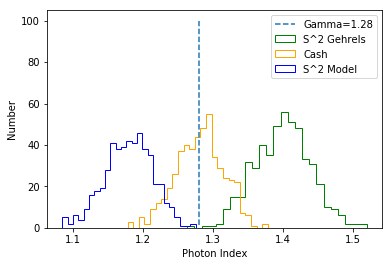

In [23]:
n_bins = 25
tcash=data_filter['cash']['p1.gamma']
#tdvar=data_filter['chi2datavar']['p1.gamma']
tgehr=data_filter['chi2gehrels']['p1.gamma']
tmvar=data_filter['chi2modvar']['p1.gamma']
#plt.hist(tdvar,bins=n_bins,color='g',histtype='step',label="S^2 Data")
plt.hist(tgehr,bins=n_bins,color='g',histtype='step',label="S^2 Gehrels")
plt.hist(tcash,bins=n_bins,color='orange',histtype='step',label="Cash")
plt.hist(tmvar,bins=n_bins,color='b',histtype='step',label="S^2 Model")
#plt.plot([1.28,1.28],[1.28,750],linestyle='dashed',label='Gamma=1.28')
plt.plot([1.28,1.28],[1.28,100],linestyle='dashed',label='Gamma=1.28')
#plt.xlim(1.22,1.35)
#plt.ylim(0,800)
plt.legend()
plt.xlabel('Photon Index')
plt.ylabel('Number')
plt.savefig('sim_1000_low_fig.png')

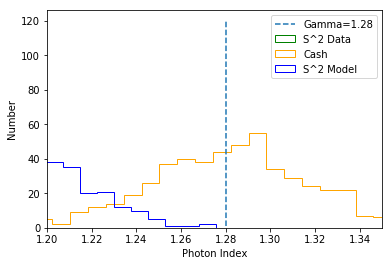

In [24]:
n_bins = 25
tcash=data_filter['cash']['p1.gamma']
tdvar=data_filter['chi2datavar']['p1.gamma']
tmvar=data_filter['chi2modvar']['p1.gamma']
plt.hist(tdvar[1:1000],bins=n_bins,color='g',histtype='step',label="S^2 Data")
plt.hist(tcash[1:1000],bins=n_bins,color='orange',histtype='step',label="Cash")
plt.hist(tmvar[1:1000],bins=n_bins,color='b',histtype='step',label="S^2 Model")
plt.plot([1.28,1.28],[1.28,120],linestyle='dashed',label='Gamma=1.28')
plt.xlim(1.2,1.35)
#plt.ylim(0,800)
plt.legend()
plt.xlabel('Photon Index')
plt.ylabel('Number')
plt.savefig('sim_1e3_fig.png')

Text(0, 0.5, 'Number')

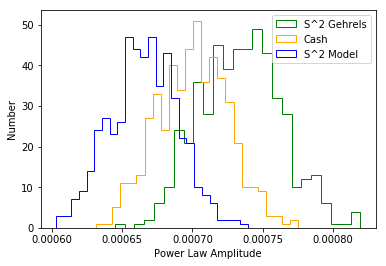

In [25]:
n_bins = 25
tcash=data_filter['cash']['p1.ampl']
#tdvar=data_filter['chi2datavar']['p1.gamma']
tgehr=data_filter['chi2gehrels']['p1.ampl']
tmvar=data_filter['chi2modvar']['p1.ampl']
#plt.hist(tdvar,bins=n_bins,color='g',histtype='step',label="S^2 Data")
plt.hist(tgehr,bins=n_bins,color='g',histtype='step',label="S^2 Gehrels")
plt.hist(tcash,bins=n_bins,color='orange',histtype='step',label="Cash")
plt.hist(tmvar,bins=n_bins,color='b',histtype='step',label="S^2 Model")
#plt.plot([1.28,1.28],[1.28,750],linestyle='dashed',label='Gamma=1.28')
#plt.plot([1.28,1.28],[1.28,100],linestyle='dashed',label='Gamma=1.28')
#plt.xlim(1.22,1.35)
#plt.ylim(0,800)
plt.legend()
plt.xlabel('Power Law Amplitude')
plt.ylabel('Number')
#plt.savefig('sim_1000_ampl_fig.png')